# Problem and Objective

**Project Description**
This project aims to analyze data provided by Global Health Observatory to focus on factors that affect life expectancy across countries. We have economic and health related indicators in this dataset, which are believed to influence life expectancy

This is a **unsupervised learning classification task** where we would apply various clustering techniques. We would try various models/algos for this. Our assumption is that we would end up with having countries with similar characteristics cluster in groups.

**Objective**
The primary goal is to uncover underlying patterns, groupings and relationships within provided features that could provide insights into the determinants of life expectancy.

# Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.neighbors import KNeighborsClassifier
from xgboost import  XGBClassifier
%matplotlib inline
from sklearn.svm import SVC

**Load Data**

In [2]:
file_path = '/content/drive/MyDrive/5509/life_expectancy_data.csv'
data = pd.read_csv(file_path)


# Data - Source and Description

**Source**

This is public dataset from Kaggle:
https://www.kaggle.com/code/ahmedabbas757/life-expectancy-prediction

The data contains various attributes of what affect life expectancey in each country. The data was collected from WHO and United Nations website with the help of Deeksha Russell and Duan Wang.The detailed data dictionary is given below.

**Data Dictionary**

* **Country**:  Name of the country.

* **Year**: The year for which the data is recorded.

* **Life Expectancy**: Average number of years a person is expected to live in the country.

* **Adult Mortality**: Adult mortality rate (probability of dying between 15 and 60 years per 1000 population).

* **Infant Deaths**:  Number of infant deaths per 1000 population.

* **Alcohol**: Recorded per capita (15+) consumption (in liters of pure alcohol).

* **Percentage Expenditure**: Expenditure on health as a percentage of Gross Domestic Product per capita (%).

* **Hepatitis B**: Hepatitis B immunization coverage among 1-year-olds (%).

* **Measles**: Number of reported measles cases per 1000 population.

* **BMI**:  Average Body Mass Index of the population.

* **Under-five Deaths**:

* **Polio**: Polio (Pol3) immunization coverage among 1-year-olds (%).

* **Total Expenditure**: General government expenditure on health as a percentage of total government expenditure (%).

* **Diphtheria**: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%).

* **HIV/AIDS**: Deaths per 1,000 live births HIV/AIDS (0-4 years).

* **GDP**: Gross Domestic Product per capita (in USD).

* **Population**: Population of the country.

* **Thinness 1-19 years**: Prevalence of thinness among children and adolescents for Age 1 to 19 (% ).

* **Thinness 5-9 years**: Prevalence of thinness among children for Age 5 to 9(%).

* **Income Composition of Resources**: Human Development Index in terms of income composition of resources (index ranging from 0 to 1).

* **Schooling**: Number of years of schooling.


**Size**

In [3]:
data.shape

(2938, 22)

We have 2938 rows with 22 attributes

# Basic Data Analysis

**Basic Data Information**

Let us look at some rows to see what we have in data.

In [4]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Let us look at statisctics for data values

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


## Missing values, Data Cleanup and Understanding Data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

The dataset has **2938 rows and 22 columns**.


**Observations based on above analysis:**

*   Country and Status are of object type while rest columns are numeric in nature.
*   We have some missing values
*   Some column names have leading or trailing spaces



**Fix column names**

Let us start by fixing column names as spaces can cause issues/confusions

In [7]:
columns=data.columns.to_list()
columns

['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [8]:
columns[3]="Life expectancy"
columns[9]="Measles"
columns[10]="BMI"
columns[11]="Under-5 Deaths"
columns[14]="Diphtheria"
columns[15]="HIV/AIDS"
columns[18]="thinness 1-19 years"
columns[19]="thinness 5-9 years"
data.columns=columns
fixed_columns=data.columns.to_list()
fixed_columns

['Country',
 'Year',
 'Status',
 'Life expectancy',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles',
 'BMI',
 'Under-5 Deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness 1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

**Missing Data and Data Imputing**


In [9]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
Under-5 Deaths                       0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness 1-19 years                 34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [10]:
countries_with_missing_values = data['Country'].unique()
print(len(countries_with_missing_values))

193


We have to be careful here for imputing data. As we know, range of factors would vary widely from smallest to largest countries, we would first try to handle missing data by taking mean of data for that given country (if available)

In [11]:
# Identify countries with missing values before imputation
countries_with_missing_values = data[data.isna().any(axis=1)]['Country'].unique()
print(countries_with_missing_values)
print(len(countries_with_missing_values))

# Impute missing values
for column in data.columns:
    if data[column].isna().any():
        # Replace NaNs with the mean value for that country
        data[column] = data.groupby('Country')[column].transform(lambda x: x.fillna(x.mean()))

# countries_with_missing_values now contains the list of countries that had missing values

countries_with_missing_values = data[data.isna().any(axis=1)]['Country'].unique()
print(countries_with_missing_values)
print(len(countries_with_missing_values))

['Algeria' 'Angola' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi'
 "Côte d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran (Islamic Republic of)' 'Iraq' 'Ireland' 'Israe

In [12]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                             17
percentage expenditure               0
Hepatitis B                        144
Measles                              0
BMI                                 34
Under-5 Deaths                       0
Polio                                0
Total expenditure                   32
Diphtheria                           0
HIV/AIDS                             0
GDP                                405
Population                         648
thinness 1-19 years                 34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

**What to do for still missing data?**

Out of 191 countries, we still have missing data for 60 countries or out of 2900 rows, it is still missing for more than 600 rows. Normally, that is big number to drop data. Ideally, we would look for missing data from some other sources. In this case, GDP and Population is missing for lot of countries and that data can be easily available. We can bring in that data and join to this data.
For the scope of this project, we would just drop missing data rows as we would still have about 120 countries to work with.

In [13]:
data_fixed = data.dropna()
print('fixed data shape:',data_fixed.shape  )
print('original data shape:',data.shape  )
data_fixed.isnull().sum()

fixed data shape: (2128, 22)
original data shape: (2938, 22)


Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
Under-5 Deaths                     0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness 1-19 years                0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

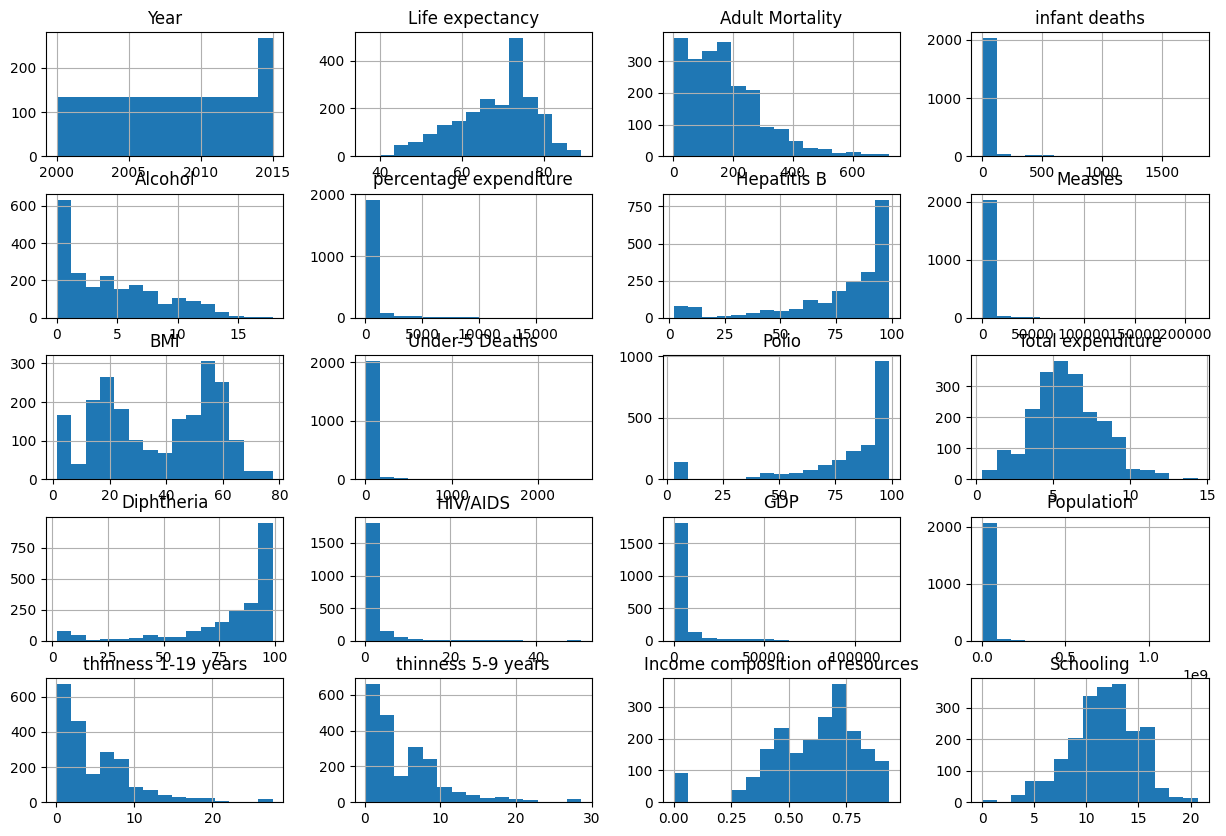

In [14]:
#plt.figure(figsize=(10, 6))
data_fixed.hist(bins=15, figsize=(15, 10))
plt.show()

**Coorrelation Analysis**

Let us see if some feature correlations are in line with our original assumptions

<ipython-input-15-89a05a12f432>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_fixed.corr(), annot=True, cmap='viridis')


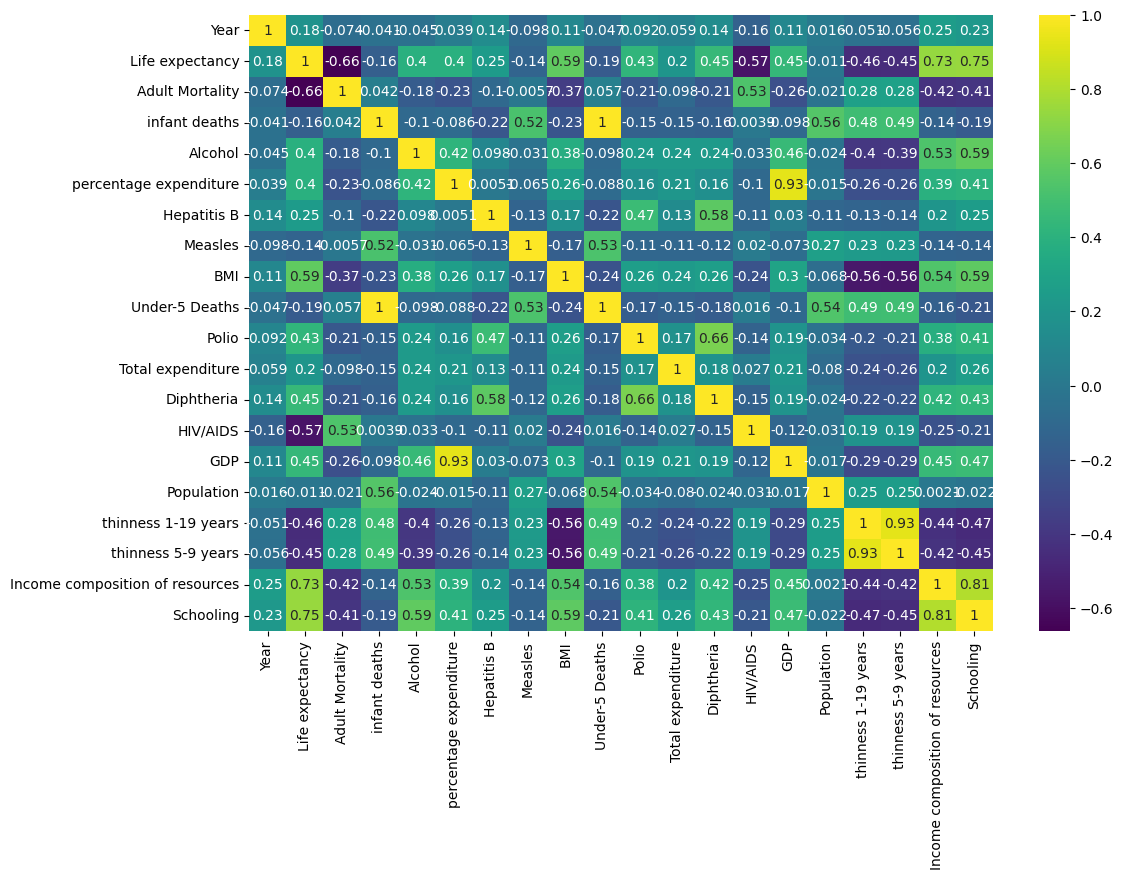

In [15]:
#Correlation Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(data_fixed.corr(), annot=True, cmap='viridis')
plt.show()

**Observations**

Income spent on health and schooling seems to have postive correlation to life expectancy and HIV/Aids and malnutrition seems to have negative correlation.

**Let us see how trend is for life expectancy in general**

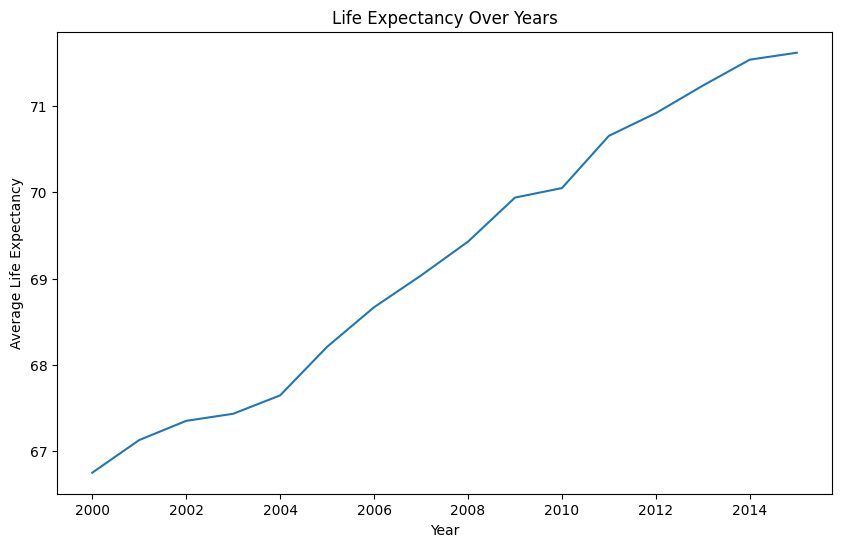

In [16]:
# Trend Analysis
plt.figure(figsize=(10, 6))
data.groupby('Year')['Life expectancy'].mean().plot(kind='line')
plt.ylabel('Average Life Expectancy')
plt.title('Life Expectancy Over Years')
plt.show()

It seems to go up as we would expect

Life expectancy
Skew : -0.64


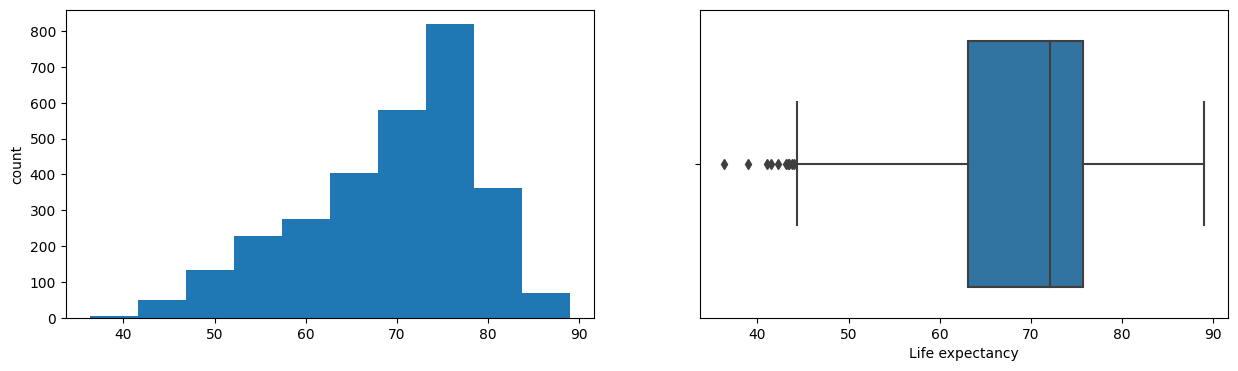

GDP
Skew : 3.24


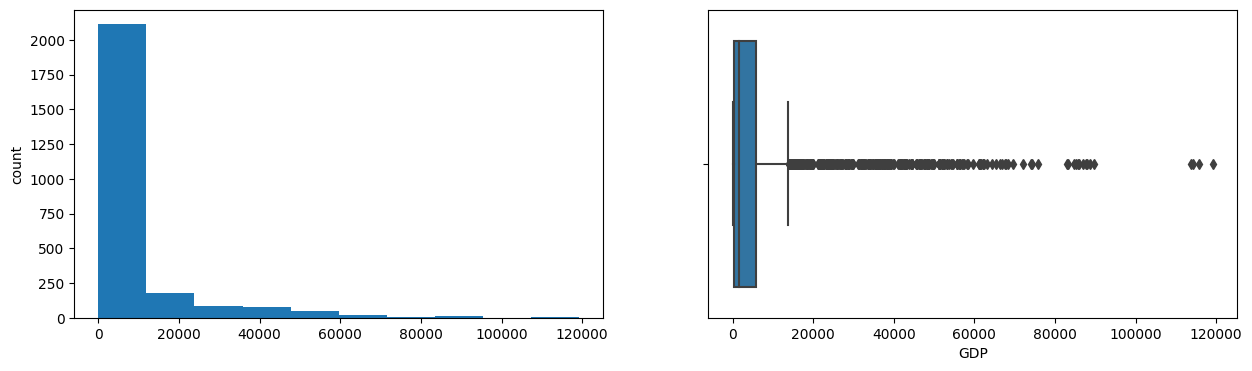

Income composition of resources
Skew : -1.14


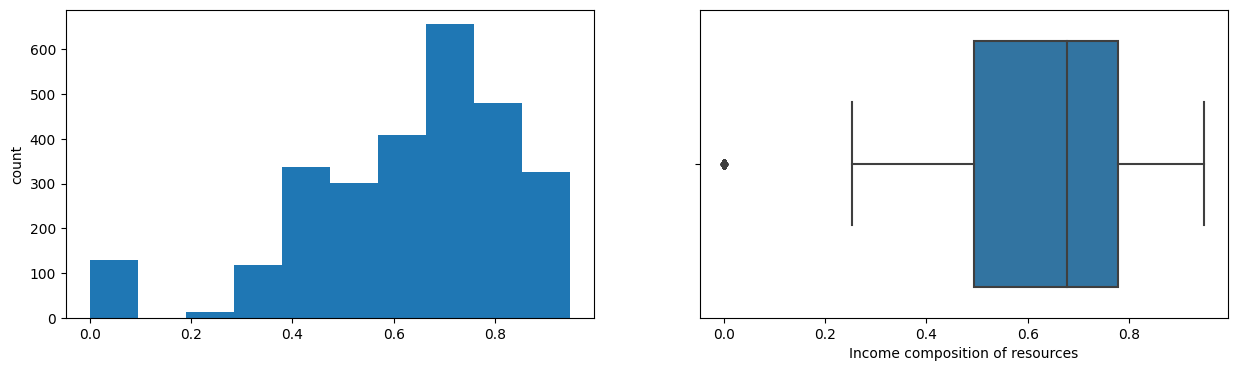

Total expenditure
Skew : 0.63


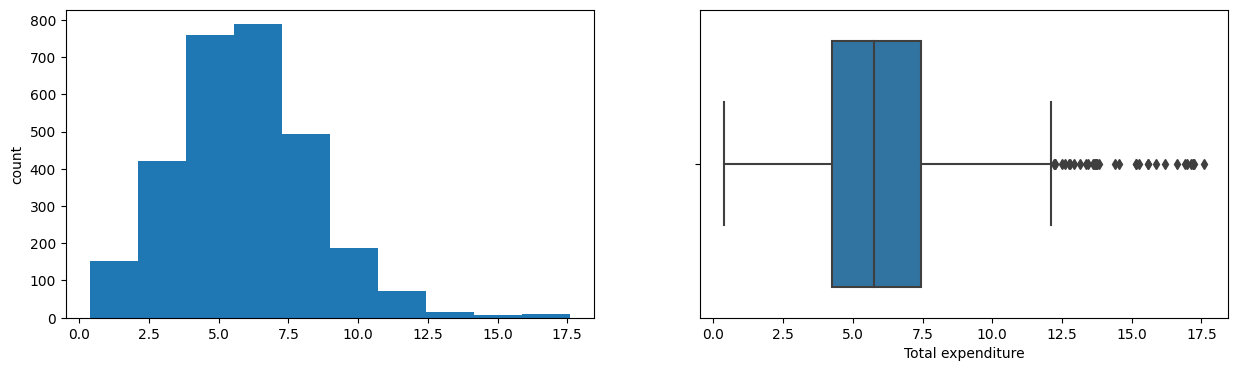

Schooling
Skew : -0.6


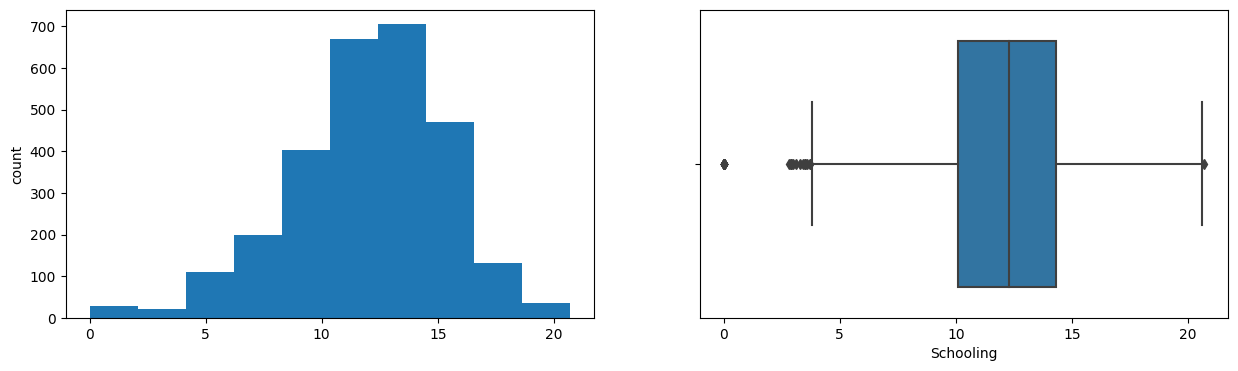

infant deaths
Skew : 9.79


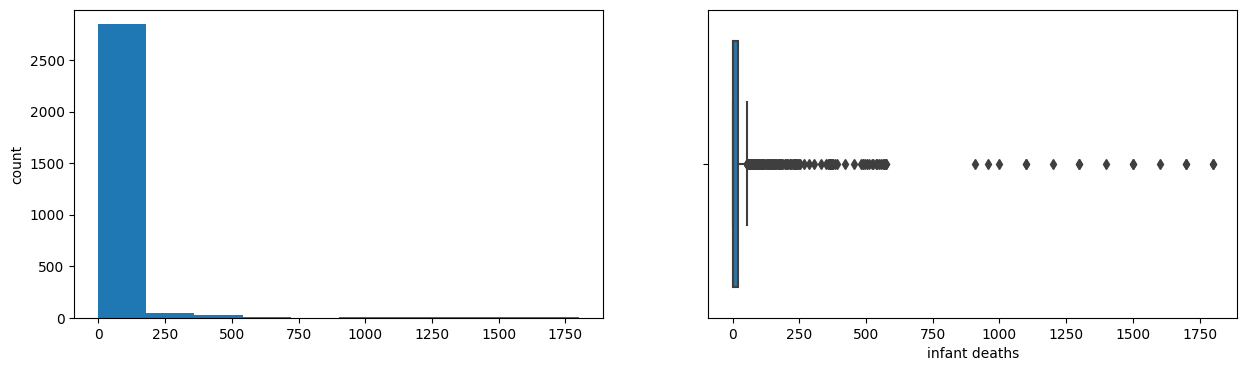

In [17]:
for col in ['Life expectancy', 'GDP', 'Income composition of resources', 'Total expenditure','Schooling','infant deaths']:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

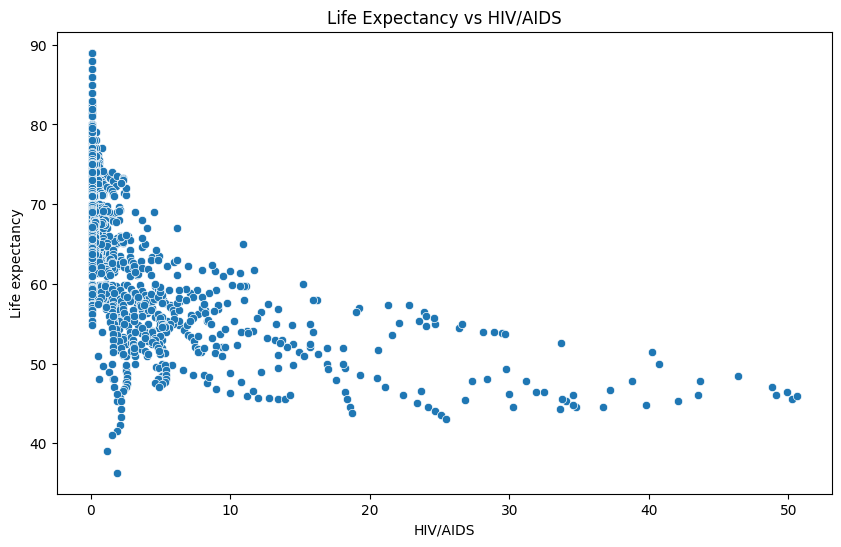

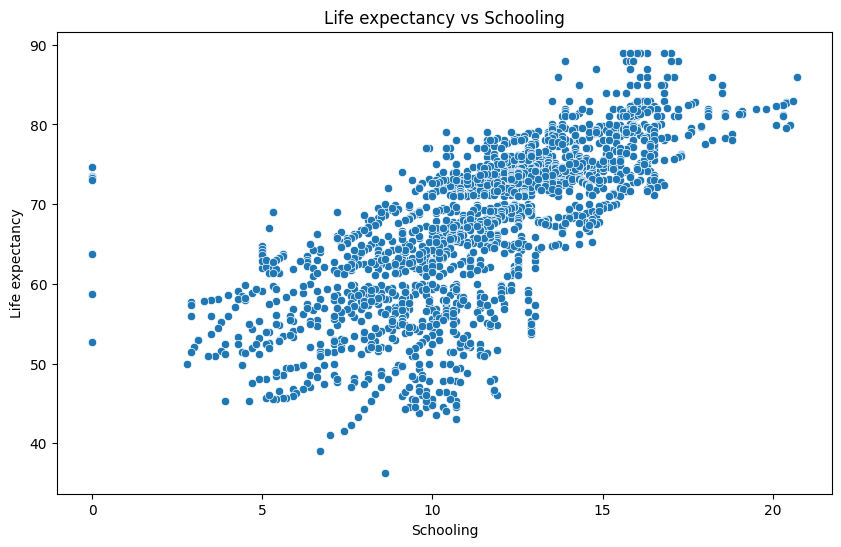

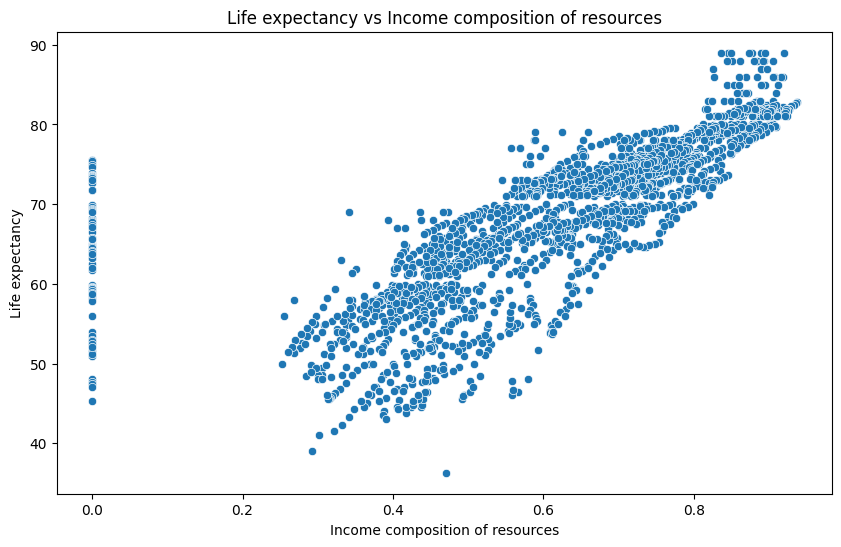

In [18]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HIV/AIDS', y='Life expectancy', data=data_fixed)
plt.title('Life Expectancy vs HIV/AIDS')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Schooling', y='Life expectancy', data=data_fixed)
plt.title('Life expectancy vs Schooling')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income composition of resources', y='Life expectancy', data=data_fixed)
plt.title('Life expectancy vs Income composition of resources')
plt.show()



# Building Models

We would try following models for this classification task:


*   KNN (nearest Neighbors)
*   DBSCAN
*   Gaussian

We would try following steps for these models:


*   Train model
*   Look at feature importance and best params
*   Plot generated clusters
*   Analyze generated clusters to see if they make sense based on our requirement


## Scale features, do PCA

In [19]:
data_fixed = data_fixed.drop(['Year'], axis=1)

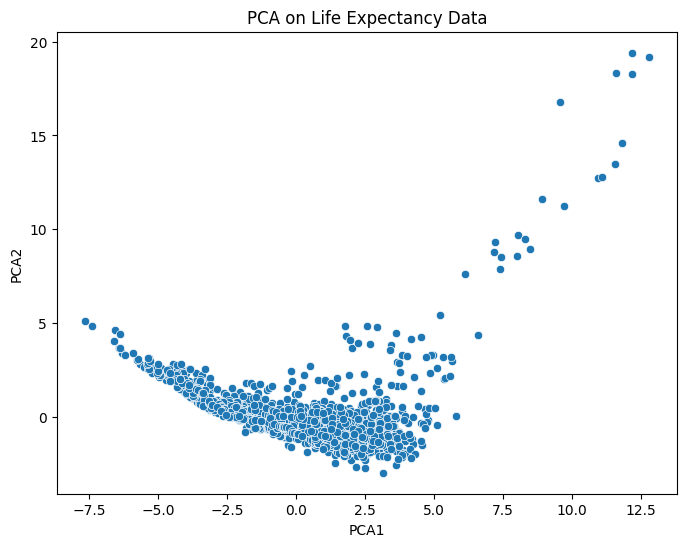

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


data_fixed_features = data_fixed.drop(['Life expectancy'], axis=1)

numerical_features = data_fixed_features.select_dtypes(include=['float64', 'int64'])

# Scaling the features to have a mean of 0 and unit
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)


# Create a DataFrame with the PCA results
data_pca = pd.DataFrame(data = pca_result, columns = ['PCA1', 'PCA2'])

# Create a DataFrame with the PCA results
data_fixed.reset_index(drop=True, inplace=True)
data_pca.reset_index(drop=True, inplace=True)
data_with_pca = pd.concat([data_fixed, data_pca], axis=1)

# Visualize PCA result
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=data_pca)
plt.title('PCA on Life Expectancy Data')
plt.show()

In [21]:
# Feature Importance - Which features contribute the most to the components
def pca_feature_importance(pca, features):
    importance_df = pd.DataFrame(pca.components_, columns=features.columns, index=['PCA1', 'PCA2'])
    return importance_df.T

importance_df = pca_feature_importance(pca, numerical_features)
print(importance_df)


                                     PCA1      PCA2
Adult Mortality                  0.196838 -0.192244
infant deaths                    0.224169  0.468675
Alcohol                         -0.251310  0.179774
percentage expenditure          -0.222287  0.221483
Hepatitis B                     -0.155502 -0.045491
Measles                          0.145350  0.312756
BMI                             -0.290453  0.069482
Under-5 Deaths                   0.229401  0.462042
Polio                           -0.213585  0.080366
Total expenditure               -0.158050  0.008115
Diphtheria                      -0.223601  0.082060
HIV/AIDS                         0.124173 -0.135243
GDP                             -0.242998  0.231024
Population                       0.111115  0.381397
thinness 1-19 years              0.317331  0.130156
thinness 5-9 years               0.316193  0.133804
Income composition of resources -0.312889  0.208770
Schooling                       -0.331894  0.187090


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


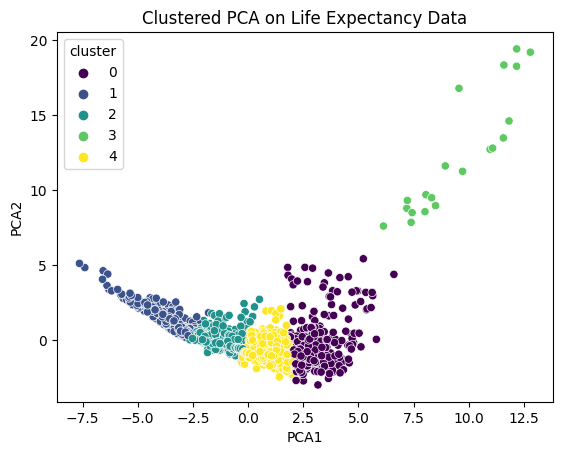

Number of outliers detected: 590


In [22]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

# Clustering Analysis using KMeans
kmeans = KMeans(n_clusters=5)
data_pca['cluster'] = kmeans.fit_predict(pca_result)

# Visualize the clustering
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=data_pca, palette='viridis')
plt.title('Clustered PCA on Life Expectancy Data')
plt.show()

# Anomaly Detection using Z-score
# Calculating the absolute Z-score for each observation
z_scores = np.abs(zscore(scaled_features))

# Define a threshold for identifying outliers
threshold = 3

# Find rows where any column has a Z-score greater than the threshold
outliers = np.where(z_scores > threshold)

# Outlier DataFrame
outlier_data = data_fixed.iloc[outliers[0]]

print(f"Number of outliers detected: {outlier_data.shape[0]}")

## KNN

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 5 clusters: 0.228


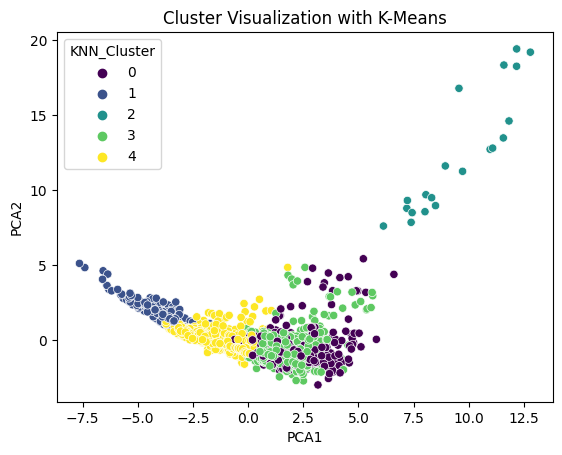

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Choosing the number of clusters with KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)

# Fitting the KMeans model
clusters = kmeans.fit_predict(scaled_features)

# Adding the cluster IDs to the original data
data_with_pca['KNN_Cluster'] = clusters

# Calculating the silhouette score
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f'Silhouette Score for {k} clusters: {silhouette_avg:.3f}')

# Visualizing the clusters (if you have PCA applied, you can plot the first two principal components)
# If you don't have PCA components, replace 'PCA1' and 'PCA2' with your chosen features
sns.scatterplot(x='PCA1', y='PCA2', hue='KNN_Cluster', data=data_with_pca, palette='viridis')
plt.title('Cluster Visualization with K-Means')
plt.show()

**Let us find optimal number of clusters**

In [24]:
from sklearn.metrics import silhouette_score

# Calculating the silhouette score using the scaled features and the cluster labels
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f'Silhouette Score for {k} clusters: {silhouette_avg:.3f}')

# You might want to calculate the silhouette score for different values of k to determine the optimal number of clusters
for n_clusters in range(2, 10):  # Example range from 2 to 9 clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, clusters)
    print(f'Silhouette Score for {n_clusters} clusters: {silhouette_avg:.3f}')


Silhouette Score for 5 clusters: 0.228


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 2 clusters: 0.241


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 3 clusters: 0.243


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 4 clusters: 0.241


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 5 clusters: 0.228


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 6 clusters: 0.226


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 7 clusters: 0.230


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 8 clusters: 0.171


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 9 clusters: 0.169


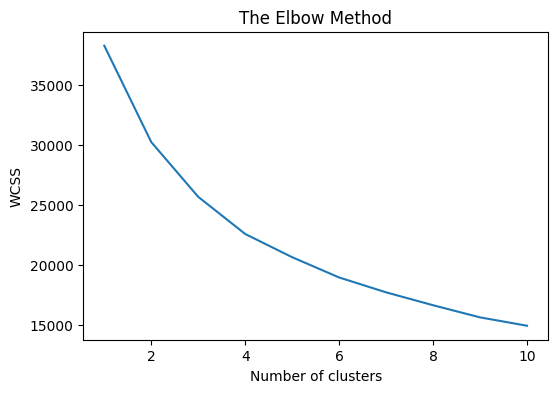

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []  # Within-cluster sum of squares

# Try different numbers of clusters
for i in range(1, 11):  # Let's try from 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph to observe 'The Elbow'
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()


For n_clusters=4, the silhouette score is: 0.242


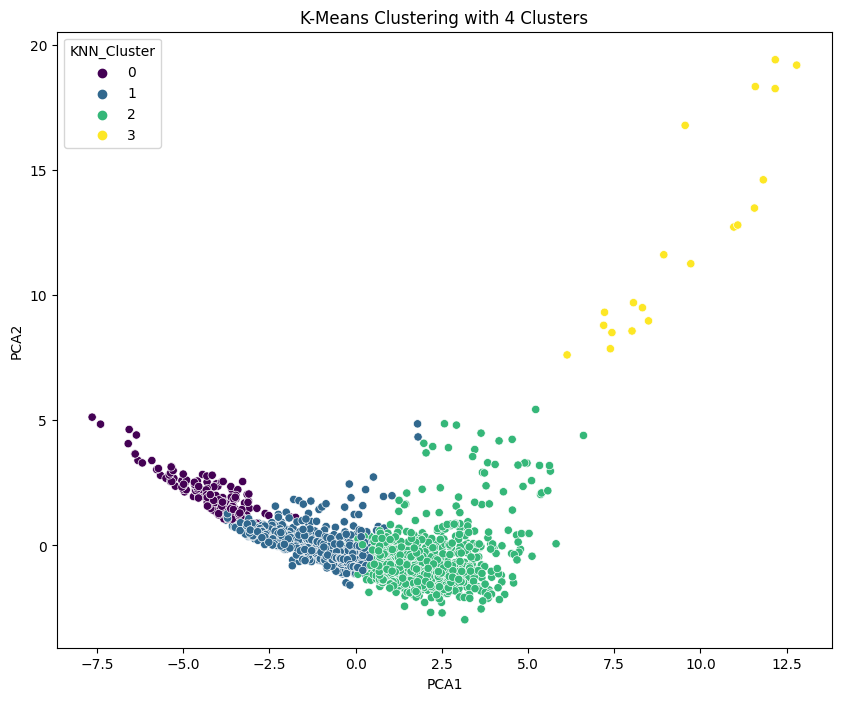

In [26]:
from sklearn.metrics import silhouette_score

# Run K-Means with the optimal number of clusters (e.g., 4)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_features)

# Calculate silhouette score for the optimal number of clusters
silhouette_avg = silhouette_score(scaled_features, cluster_labels)
print(f'For n_clusters={optimal_clusters}, the silhouette score is: {silhouette_avg:.3f}')

# Plotting the clusters
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
data_with_pca['PCA1'] = pca_result[:, 0]
data_with_pca['PCA2'] = pca_result[:, 1]
data_with_pca['KNN_Cluster'] = cluster_labels

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='KNN_Cluster', data=data_with_pca, palette='viridis')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.show()


<ipython-input-27-dfe3696bfbfa>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_profiles = data_with_pca.groupby('KNN_Cluster').mean()


             Life expectancy  Adult Mortality  infant deaths    Alcohol  \
KNN_Cluster                                                               
0                  81.281119        63.993007       1.027972  10.220312   
1                  73.444087       125.264901       8.371807   5.442204   
2                  60.032159       249.859031      47.648678   2.377150   
3                  61.925000       124.150000    1207.000000   3.467100   

             percentage expenditure  Hepatitis B       Measles        BMI  \
KNN_Cluster                                                                 
0                       5893.466608    74.228008    568.937063  54.018182   
1                        402.304616    86.891088   1053.494797  47.277389   
2                        102.934719    67.477679   3396.966960  22.109251   
3                         30.340323    35.336364  68787.100000  15.425000   

             Under-5 Deaths      Polio  ...  Diphtheria  HIV/AIDS  \
KNN_Cluster      

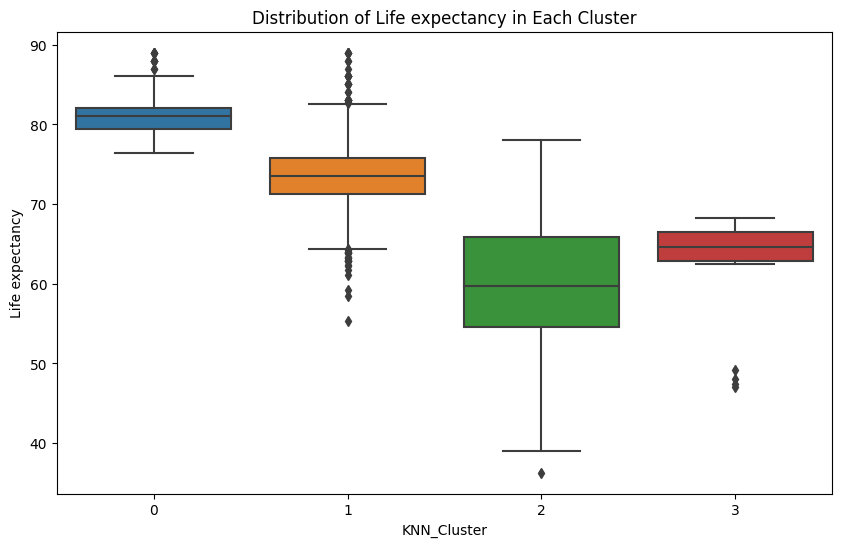

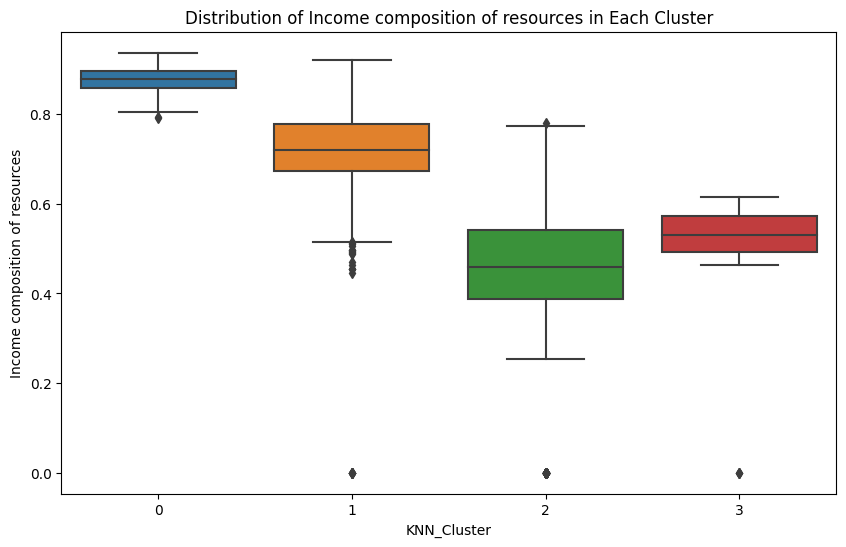

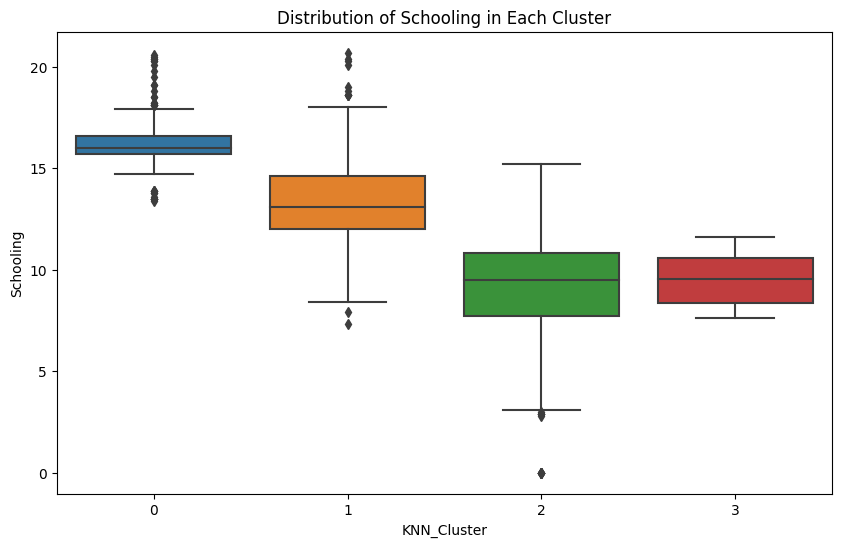

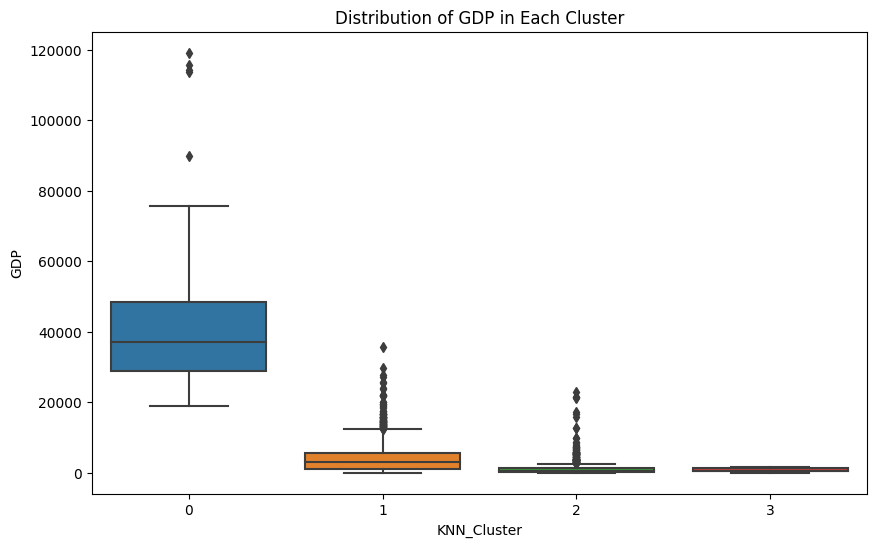

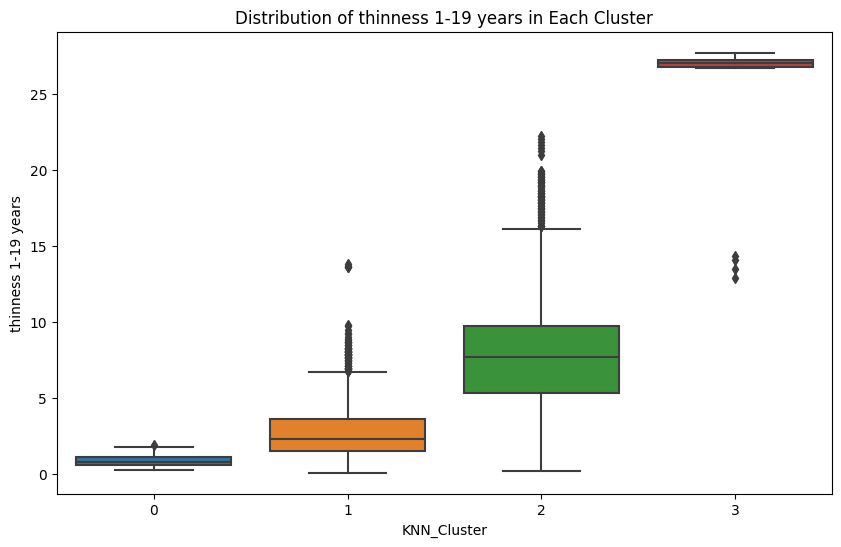

In [27]:
# Profile each cluster
cluster_profiles = data_with_pca.groupby('KNN_Cluster').mean()
print(cluster_profiles)

# Visualize cluster characteristics
for col in ['Life expectancy','Income composition of resources','Schooling','GDP','thinness 1-19 years']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='KNN_Cluster', y=col, data=data_with_pca)
    plt.title(f'Distribution of {col} in Each Cluster')
    plt.show()


In [28]:
# Group data by cluster label and list countries in each cluster
clustered_countries = data_with_pca.groupby('KNN_Cluster')['Country'].unique()

for cluster in clustered_countries.index:
    print(f"Countries in Cluster {cluster}:")
    print(clustered_countries[cluster])
    print("\n")


Countries in Cluster 0:
['Australia' 'Austria' 'Belgium' 'Canada' 'Cyprus' 'France' 'Germany'
 'Greece' 'Ireland' 'Israel' 'Italy' 'Luxembourg' 'Malta' 'Netherlands'
 'Portugal' 'Spain' 'Sweden']


Countries in Cluster 1:
['Albania' 'Algeria' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Belarus' 'Belgium' 'Belize' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Cabo Verde' 'Cambodia' 'Canada' 'Chile'
 'China' 'Colombia' 'Comoros' 'Costa Rica' 'Croatia' 'Cyprus'
 'Dominican Republic' 'Ecuador' 'El Salvador' 'Estonia' 'Fiji' 'France'
 'Gabon' 'Georgia' 'Germany' 'Greece' 'Guatemala' 'Guyana' 'Honduras'
 'Indonesia' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Jordan'
 'Kazakhstan' 'Kiribati' 'Latvia' 'Lebanon' 'Lithuania' 'Luxembourg'
 'Malawi' 'Malaysia' 'Maldives' 'Malta' 'Mauritius' 'Mexico' 'Mongolia'
 'Montenegro' 'Morocco' 'Namibia' 'Netherlands' 'Nicaragua' 'Panama'
 'Papua New Guinea' 'Paraguay' 'Peru' 'Philippines' 'Poland' 'Portugal'
 'Romania' 'Russian 

## DBSCAN

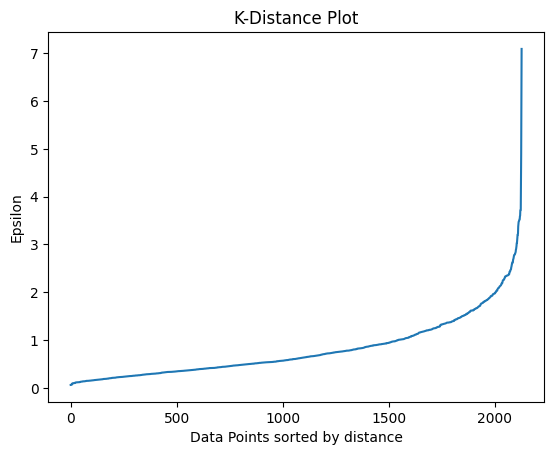

In [29]:
from sklearn.neighbors import NearestNeighbors

# Finding the optimal eps value using a K-Distance Plot
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(scaled_features)
distances, indices = neighbors_fit.kneighbors(scaled_features)

# Sort distance values by ascending value
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.plot(distances)
plt.title('K-Distance Plot')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()


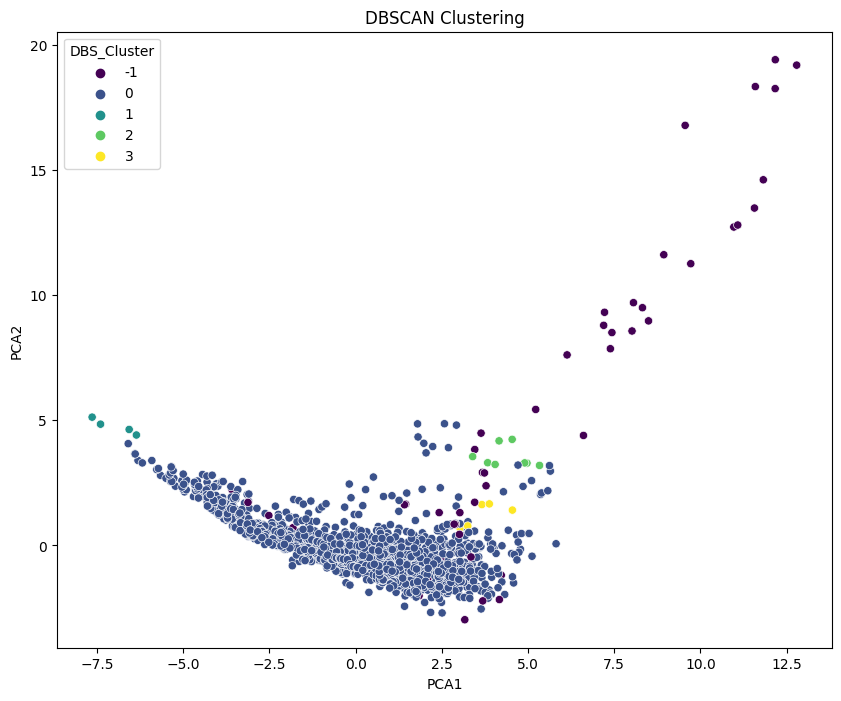

In [30]:
from sklearn.cluster import DBSCAN

# DBSCAN clustering
# had to try different values to get to eps value
dbscan = DBSCAN(eps=3.0, min_samples=5)
clusters = dbscan.fit_predict(scaled_features)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
data_with_pca['PCA1'] = pca_result[:, 0]
data_with_pca['PCA2'] = pca_result[:, 1]

# Add the cluster labels to the original data
data_with_pca['DBS_Cluster'] = clusters

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='DBS_Cluster', data=data_with_pca, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()


<ipython-input-31-0770f6a329a8>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_profiles = data_with_pca.groupby('DBS_Cluster').mean()


             Life expectancy  Adult Mortality  infant deaths    Alcohol  \
DBS_Cluster                                                               
-1                 62.067925       204.056604     538.811321   4.492277   
 0                 68.332021       172.988338      20.541788   4.414947   
 1                 82.775000        53.250000       0.000000  11.292500   
 2                 53.362500       376.625000     522.000000   9.049583   
 3                 65.280000       172.000000     278.600000   0.018000   

             percentage expenditure  Hepatitis B       Measles        BMI  \
DBS_Cluster                                                                 
-1                       427.302997    43.710112  36166.301887  25.667925   
 0                       617.535535    78.235891   1778.712342  37.128669   
 1                     16940.197725    94.250000      1.750000  32.850000   
 2                        95.050772    44.875000   7594.125000  19.850000   
 3          

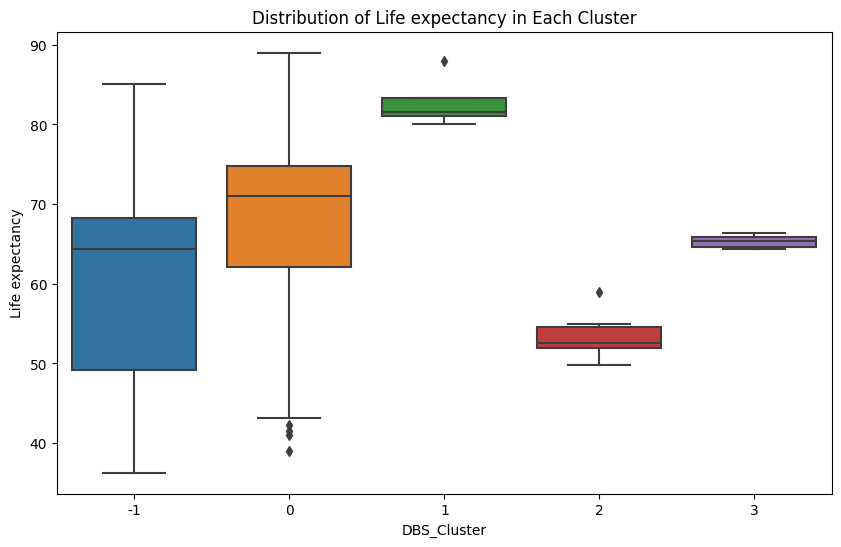

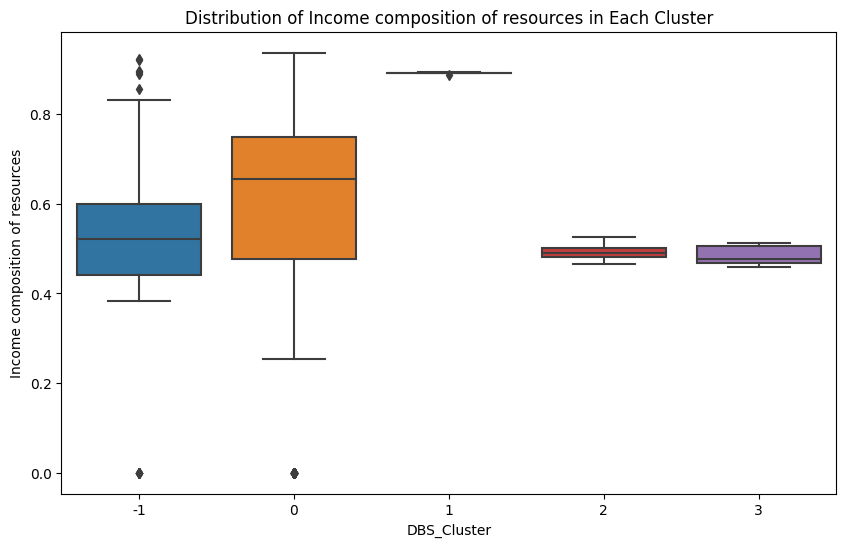

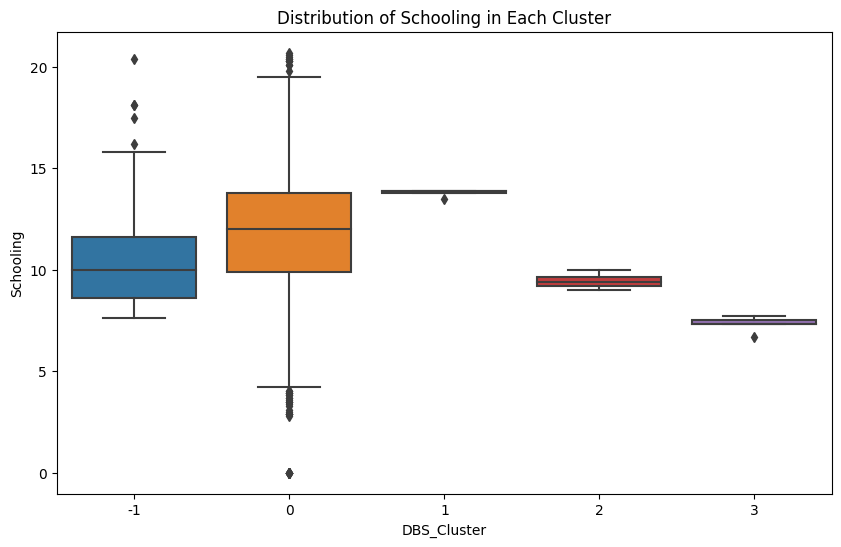

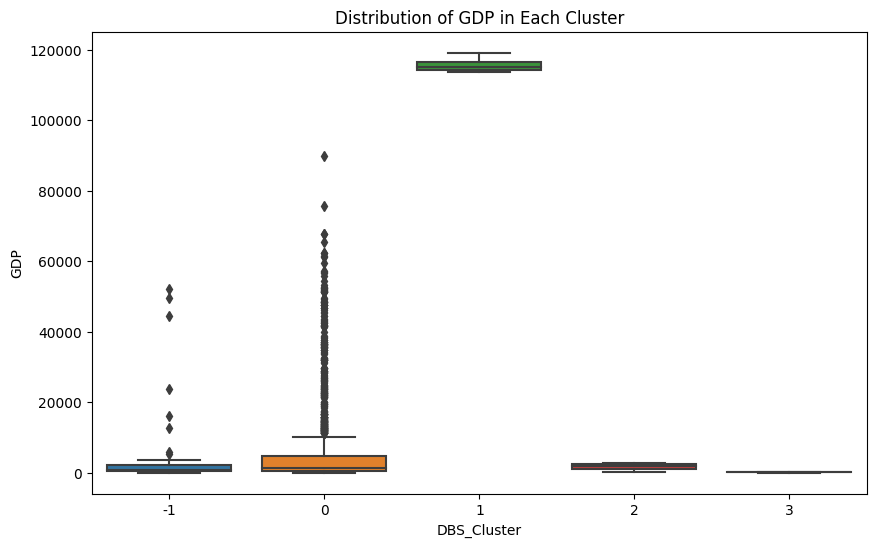

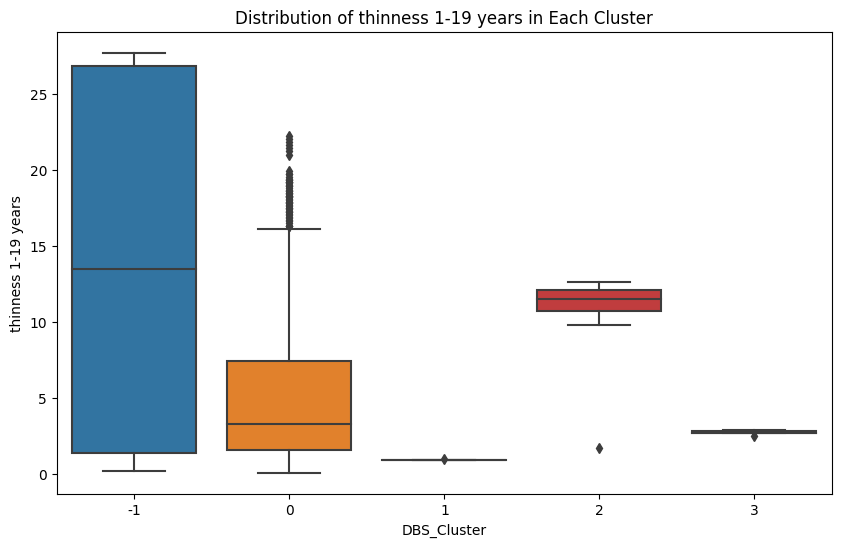

In [31]:
# Profile each cluster
cluster_profiles = data_with_pca.groupby('DBS_Cluster').mean()
print(cluster_profiles)

# Visualize cluster characteristics
for col in ['Life expectancy','Income composition of resources','Schooling','GDP','thinness 1-19 years']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='DBS_Cluster', y=col, data=data_with_pca)
    plt.title(f'Distribution of {col} in Each Cluster')
    plt.show()

## GaussianMixture

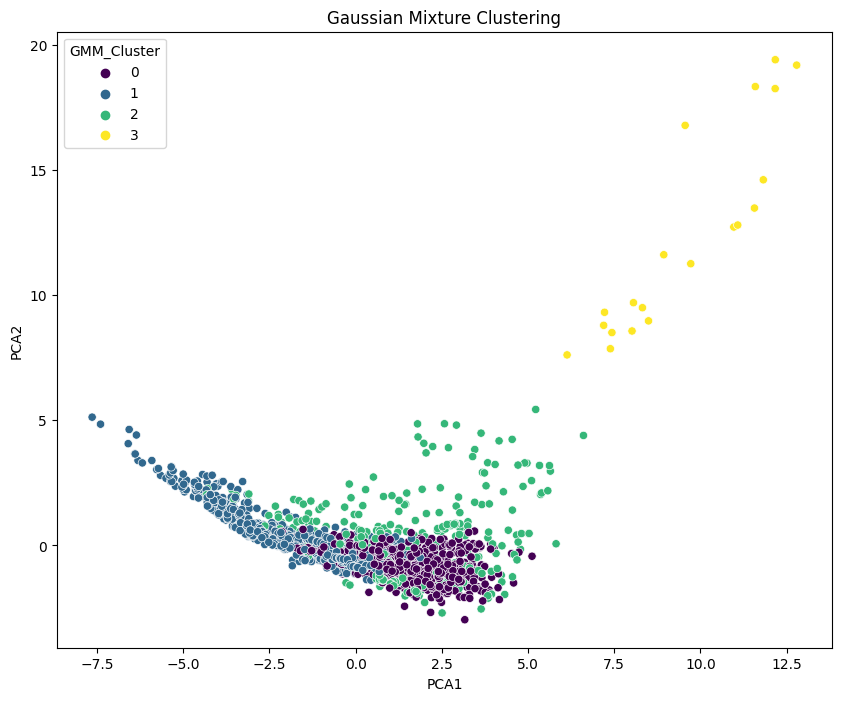

In [32]:
from sklearn.mixture import GaussianMixture

# Applying Gaussian Mixture Model
gmm = GaussianMixture(n_components=4)
gmm_clusters = gmm.fit_predict(scaled_features)

# Add the cluster labels to your original data
data_with_pca['GMM_Cluster'] = gmm_clusters

# Visualizing the clusters (using PCA for a 2D representation)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
data_with_pca['PCA1'] = pca_result[:, 0]
data_with_pca['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='GMM_Cluster', data=data_with_pca, palette='viridis')
plt.title('Gaussian Mixture Clustering')
plt.show()

<ipython-input-33-8637a11e7109>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_profiles = data_with_pca.groupby('GMM_Cluster').mean()


             Life expectancy  Adult Mortality  infant deaths   Alcohol  \
GMM_Cluster                                                              
0                  60.750250       245.596250      23.367500  2.950922   
1                  74.975510       112.900000       3.463265  5.959379   
2                  66.117683       186.917683      91.990854  3.571455   
3                  61.925000       124.150000    1207.000000  3.467100   

             percentage expenditure  Hepatitis B       Measles        BMI  \
GMM_Cluster                                                                 
0                        110.674028    70.517069   1461.705000  27.126625   
1                       1174.886604    86.066228     89.728571  47.577449   
2                        370.543708    70.029446   9213.567073  28.795122   
3                         30.340323    35.336364  68787.100000  15.425000   

             Under-5 Deaths      Polio  ...          GDP    Population  \
GMM_Cluster       

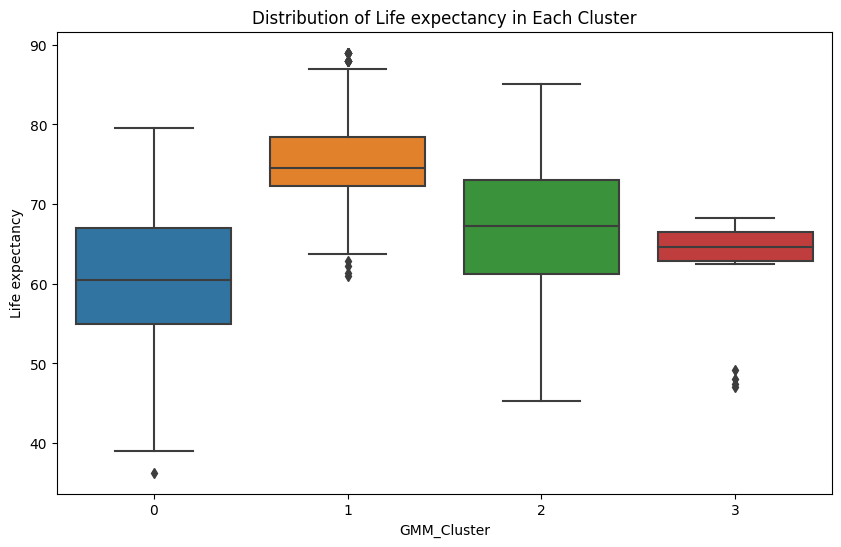

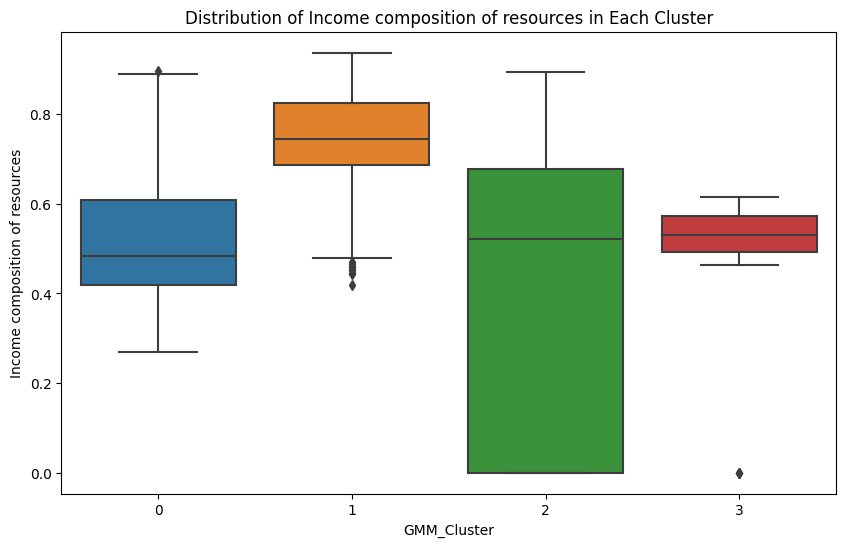

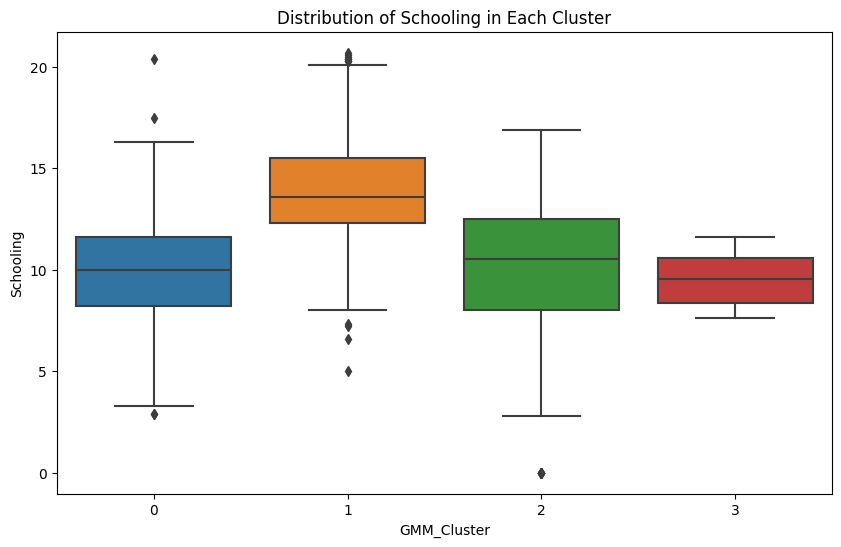

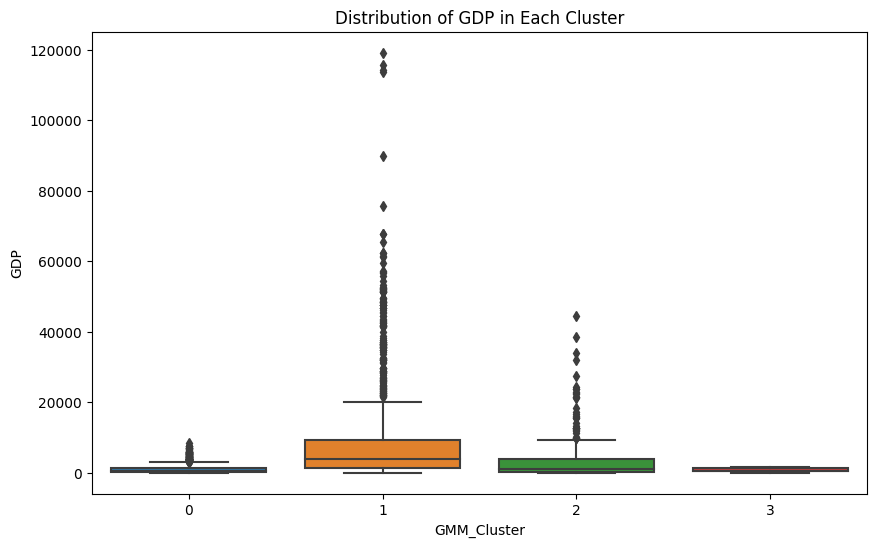

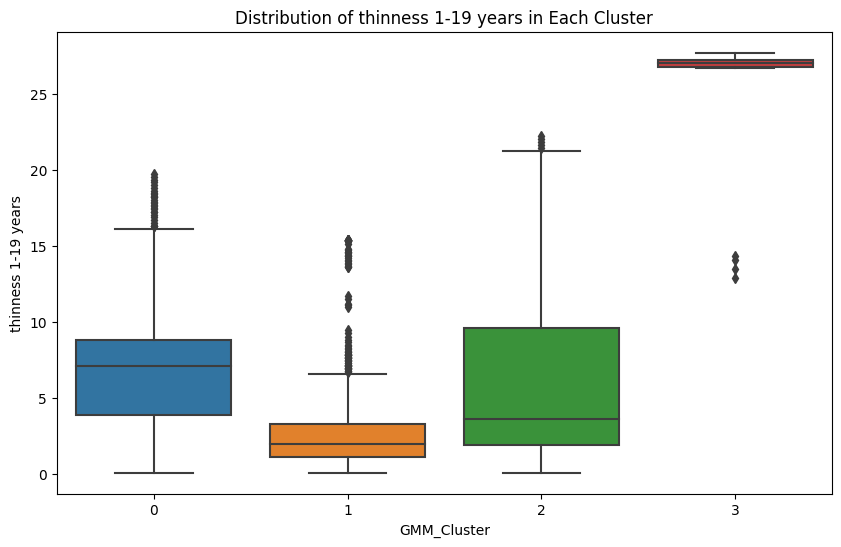

In [33]:
# Profile each cluster
cluster_profiles = data_with_pca.groupby('GMM_Cluster').mean()
print(cluster_profiles)

# Visualize cluster characteristics
for col in ['Life expectancy','Income composition of resources','Schooling','GDP','thinness 1-19 years']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='GMM_Cluster', y=col, data=data_with_pca)
    plt.title(f'Distribution of {col} in Each Cluster')
    plt.show()

# Results Summary and Conclusion

## Feature and Model Summary

Our original assumptions about some **features contributing** to life expectance turned out to be correct.

*   Countries with more resources generally had higher life expectancy
*   Countries that spent more on health care proportional to their GDP, had better life expectancy
*   Higher education also leads to better life expectancy
*   Malnutrition leads to lower life expectancy
*   Infant deaths lead to lower life expectancy


**Model Evaluation**

* KNN turned out to best model in clustering data for life expectancy
* We used score and elbow method to arrive at optimal number of clusters
* Model was able to pick better boundaries for clustering and those boundaries were in line with expected features


## Stakeholders Summary

Based on what we saw from feature analysis and model results, we are able to provide following guidelines for stake holders:

*   Malnutrition: Focus on nutrition requirements of childern as it has lasting impact on life expectancy
*   Education: Better education leads to better life expectancy. This may indirectly be dependent on financial factors but some countries do have more emphasis on education than others for same financial state
*   Money spent on health: It may easily be dismissed as totally dependent on financial state of a given country but policy makers need to understand that money spent early on children health will ultimately lead to much more financial benefits to country as a whole also



